# Agentes Reactivos
Méndez Pool Joan de Jesús | 160300102

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import cv2
import random
from IPython.display import HTML
%matplotlib notebook
# Constantes de colores
black, white =((0,0,0),(255,255,255))
# Posición del Agente
blue = (0,0,255)
# posiciones vecinas definidas por el siguiente orden de terminos (y, x)
neighbors = [(-1,-1), (-1,0), (-1,1), (0,1), (1,1), (1,0),(1,-1), (0,-1) ]
# Conjunto de Movimientos Permitidos
# definido por orden: (y,x)
moveset = {"norte":(-1,0), "este":(0,1), "oeste":(0,-1), "sur":(1,0) }

# Funciones la creación de la Retícula

In [2]:
def Grid():
    image = np.zeros((12,12,3), np.uint8)
    # Solidos
    image[4][2] = white
    image[5][2] = white
    image[6][2] = white

    image[4][3] = white
    image[5][3] = white
    image[6][3] = white

    image[4][4] = white
    image[4][5] = white
    
    image[4][6] = white
    image[5][6] = white
    image[6][6] = white

    image[4][7] = white
    image[5][7] = white
    image[6][7] = white
    # Se invierte la imagen binaria
    etval, imin = cv2.threshold(image, 1, 255, cv2.THRESH_BINARY_INV)

    Set_Rand_Position(imin)

    return imin

def Copy_Grid(image):
    cim = image.copy()
    (y,x)=Detect_Position(image)
    cim[y][x] = white
    return cim

# Colocar el Agente en una posición Aleatoria evitando los sólidos
def Set_Rand_Position(image):
    F = True
    while F:
        (y, x) = (random.randint(0,image.shape[0]-1), random.randint(0,image.shape[1]-1))
        if not (tuple(image[y][x])==black):
            image[y][x] = blue
            F = False

# Funciones de Soporte para rutinas de creación de Estados y otras tareas complementarias

In [3]:
# Detecta la posición del agente
def Detect_Position(image):
    for (yi,column) in enumerate(image):
        for (xi,value) in enumerate(column):
            if tuple(value) == blue:
                (y,x) = (yi,xi)
    return (y,x)

# Verifica los estados de los vecinos en la posición dada
def Neighborhood(position, image):
    y, x = position
    S = []
    B = []
    for (yi, xi) in neighbors:
        if not Image_Range((yi+y, xi+x), image.shape):
            B.append(1)
            S.append(1)
        else:
            B.append(0)
            if (tuple(image[yi+y][xi+x])==black):
                S.append(1)
                
            else:
                S.append(0)
    return (S,B)

# Verifica si la posición se encuentra dentro de los limites de la imagen
def Image_Range(position, shape):
    cy, cx = position
    flag = np.logical_and([cx >= 0, cy >= 0], [cx < shape[1], cy < shape[0]])
    return np.logical_and(flag[0], flag[1])

# Verifica si se llego a una esquina Cóncava
def Concava(B):
    val = len(list(filter(lambda x: x > 0, B)))
    return True if (val >= 5) else False

# Cambia la posición del agente
def Change_Position(position, move, image):
    im = image.copy()
    y, x = position
    yi, xi = move
    im[y][x] = white
    im[yi+y][xi+x] = blue
    return (im,(yi+y,xi+x))

# Funciones de la Unidad Lógica Umbralizada

In [4]:
# Compuertas Lógicas
def And(A,B):
    return 1 if np.logical_and(A, B) else 0
def Or(A,B):
    return 1 if np.logical_or(A, B) else 0
def Not(A):
    return 1 if np.logical_not(A) else 0

# Unidad Lógica Umbralizada
def TLU(Xi, Yi):
    # Aplicación de la regla de decisión de movimiento
    val = And(Or(Xi[0],Xi[1]), Not(Or(Yi[0], Yi[1])))
    # Umbral de 0.5
    return True if val > 0.5 else False

# Función de Animación JS

In [5]:
def Animation(gif):
    # Código para la creación de la animación en JS # Funciona
    fig = plt.figure()
    plt.axis('off')
    # ims is a list of lists, each row is a list of artists to draw in the current frame; here we are just 
    # animating one artist, the image, in each frame
    ims = []
    for i in range(len(gif)):
        im = plt.imshow(gif[i], animated=True)
        ims.append([im])
    ani = animation.ArtistAnimation(fig, ims, interval=200, blit=True, repeat_delay=1500)
    return HTML(ani.to_jshtml())

# Simulación de Movimiento

In [6]:
# Simulación
def Running():
    im = Grid()
    cim = Copy_Grid(im)
    Run = True
    (y,x)= Detect_Position(im)
    visited = set()
    gif = [im]
    while Run:
        # S = Estados de los vecinos S1...Sn
        # B = Limites de la reticula
        S, B = Neighborhood((y,x), cim)
        # x1 = S2 + S3, x2 = S4 + S5, x3 = S6 + S7, x4 = S8 + S1
        X = { "x1": S[1:3], "x2": S[3:5], "x3": S[5:7], "x4": [S[-1], S[0]]}
        if Concava(B) or ((y,x) in visited):
            Run = False
        elif TLU(X["x1"], X["x2"]):
            (nim, (cy,cx)) = Change_Position((y,x), moveset["este"], cim)
        elif TLU(X["x2"], X["x3"]):
            (nim, (cy,cx)) = Change_Position((y,x), moveset["sur"], cim)
        elif TLU(X["x3"], X["x4"]):
            (nim, (cy,cx)) = Change_Position((y,x), moveset["oeste"], cim)
        elif TLU(X["x4"], X["x1"]):
            (nim, (cy,cx)) = Change_Position((y,x), moveset["norte"], cim)
        else:
            (nim, (cy,cx)) = Change_Position((y,x), moveset["norte"], cim)
        if Run:
            visited.add((y,x))
            (y,x) = (cy,cx)
            gif.append(nim)
    return Animation(gif)

# Pruebas

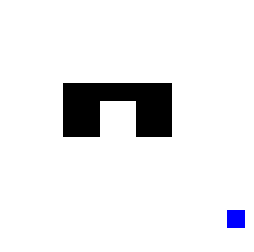

In [7]:
Running()

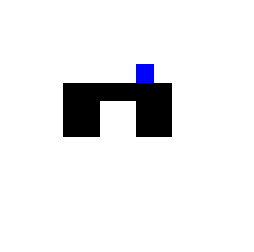

In [8]:
Running()

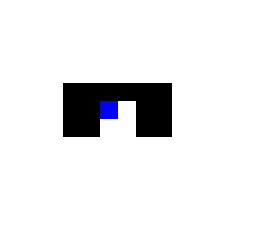

In [9]:
Running()